In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [16,8]

In [2]:
df = pd.read_csv('AirPassengers.csv', sep=',', parse_dates=True, index_col=0)
data = df.values
np.random.seed(3)

In [3]:
data = data.astype('float32')

In [4]:
treino = data[0:120,:]
teste = data[120:,:]

In [5]:
def prep_dados(data, lags=1):
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)

In [7]:
lags = 1
X_treino, y_treino = prep_dados(treino, lags)
X_teste, y_teste = prep_dados(teste, lags)
y_true = y_teste

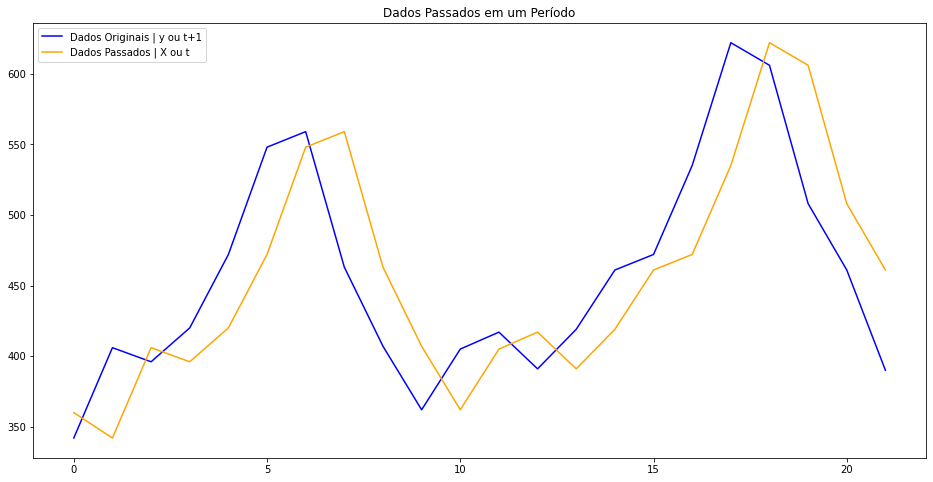

In [12]:
plt.plot(y_teste, label='Dados Originais | y ou t+1', color='blue')
plt.plot(X_teste, label='Dados Passados | X ou t', color='orange')
plt.legend(loc='best')
plt.title('Dados Passados em um Período')
plt.show()

In [14]:
md1 = Sequential()
md1.add(Dense(3, input_dim=lags, activation='relu'))
md1.add(Dense(1))
md1.compile(loss='mean_squared_error', optimizer='adam')
md1.fit(X_treino, y_treino, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
59/59 - 0s - loss: 120429.1172 - 473ms/epoch - 8ms/step
Epoch 2/200
59/59 - 0s - loss: 101848.2656 - 37ms/epoch - 625us/step
Epoch 3/200
59/59 - 0s - loss: 87720.1953 - 44ms/epoch - 744us/step
Epoch 4/200
59/59 - 0s - loss: 76004.8672 - 47ms/epoch - 795us/step
Epoch 5/200
59/59 - 0s - loss: 65562.2578 - 38ms/epoch - 642us/step
Epoch 6/200
59/59 - 0s - loss: 55615.9961 - 46ms/epoch - 787us/step
Epoch 7/200
59/59 - 0s - loss: 46040.4062 - 39ms/epoch - 659us/step
Epoch 8/200
59/59 - 0s - loss: 37022.3789 - 41ms/epoch - 694us/step
Epoch 9/200
59/59 - 0s - loss: 28724.4492 - 47ms/epoch - 794us/step
Epoch 10/200
59/59 - 0s - loss: 21481.0430 - 36ms/epoch - 609us/step
Epoch 11/200
59/59 - 0s - loss: 15461.1455 - 47ms/epoch - 794us/step
Epoch 12/200
59/59 - 0s - loss: 10796.8252 - 43ms/epoch - 725us/step
Epoch 13/200
59/59 - 0s - loss: 7185.6543 - 41ms/epoch - 693us/step
Epoch 14/200
59/59 - 0s - loss: 4788.9106 - 44ms/epoch - 752us/step
Epoch 15/200
59/59 - 0s - loss: 3169.4209 - 

In [15]:
train_score = md1.evaluate(X_treino, y_treino, verbose=0)
print("Pontuação de treino: {:.2f} MSE ({:.2f} RMSE".format(train_score, math.sqrt(train_score)))

test_score = md1.evaluate(X_teste, y_teste, verbose=0)
print("Pontuação de treino: {:.2f} MSE ({:.2f} RMSE".format(test_score, math.sqrt(test_score)))

Pontuação de treino: 818.49 MSE (28.61 RMSE
Pontuação de treino: 2804.11 MSE (52.95 RMSE


In [16]:
treino_pred = md1.predict(X_treino)
teste_pred = md1.predict(X_teste)

1/1 [==============================] - 0s 16ms/step


In [17]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:,:] = np.nan
train_predict_plot[lags: len(treino_pred) + lags, :] = treino_pred

In [20]:
teste_predict_plot = np.empty_like(data)
teste_predict_plot[:,:] = np.nan
teste_predict_plot[len(treino_pred) + (lags*2) + 1:len(data)-1,:] = teste_pred

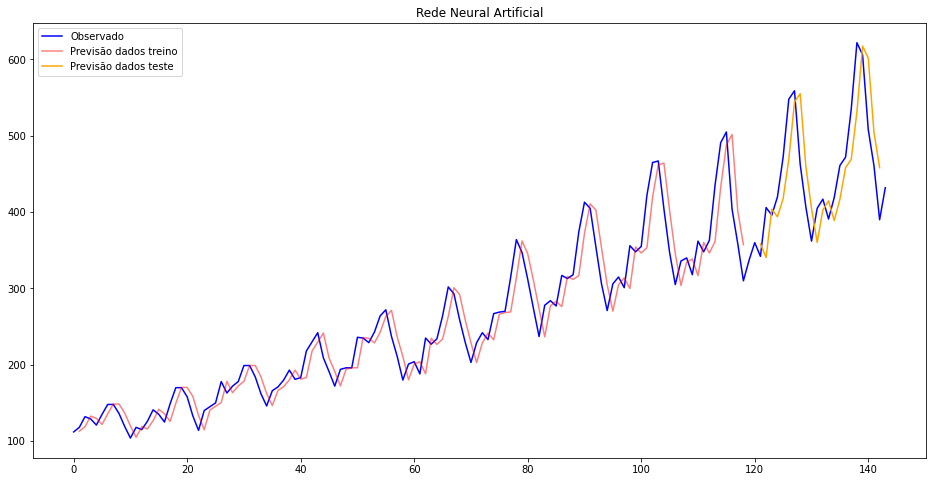

In [21]:
plt.plot(data, label='Observado', color='blue')
plt.plot(train_predict_plot, label="Previsão dados treino", color='red', alpha=0.5)
plt.plot(teste_predict_plot, label="Previsão dados teste", color='Orange')
plt.legend(loc='best')
plt.title('Rede Neural Artificial')
plt.show()